2025-11-01 14:26:04.695447: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-01 14:26:04.758575: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-01 14:26:06.197815: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 64s 0us/step


/home/mohit/miniconda3/envs/dl/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1762007237.284028    4064 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1456 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2050, pci bus id: 0000:01:00.0, compute capability: 8.6


Epoch 1/5


2025-11-01 14:27:31.217626: I external/local_xla/xla/service/service.cc:163] XLA service 0x752c2000af50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-11-01 14:27:31.218798: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 2050, Compute Capability 8.6
2025-11-01 14:27:31.341013: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-11-01 14:27:31.703420: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91301


  5/625 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.0955 - loss: 2.2927

I0000 00:00:1762007258.295800    4180 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.4577 - loss: 1.5077 - val_accuracy: 0.5481 - val_loss: 1.2727
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.5938 - loss: 1.1600 - val_accuracy: 0.6095 - val_loss: 1.1202
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.6456 - loss: 1.0142 - val_accuracy: 0.6391 - val_loss: 1.0489
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6799 - loss: 0.9185 - val_accuracy: 0.6595 - val_loss: 0.9954
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.7067 - loss: 0.8424 - val_accuracy: 0.6743 - val_loss: 0.9500


2025-11-01 14:28:20.764852: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_131', 20 bytes spill stores, 20 bytes spill loads



313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6753 - loss: 0.9388
Test Accuracy: 0.6753000020980835


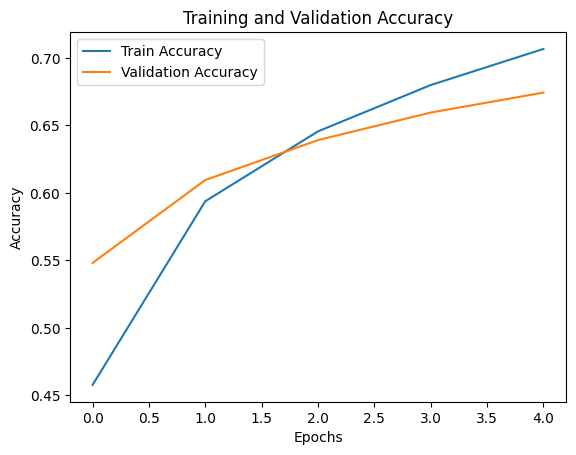

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 998ms/step


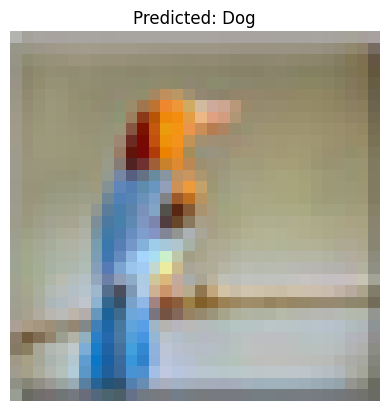

In [1]:
# Step a: Import Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Step b: Load and Preprocess Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values (0–255 → 0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step c: Define CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')   # 10 classes in CIFAR-10
])

# Step d: Compile and Train
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Step e: Evaluate Model
loss, acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", acc)

# Step f: Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Step g: Predict a Random Image
idx = np.random.randint(0, len(x_test))
img = x_test[idx]
plt.imshow(img)
plt.axis('off')